📘 Bienvenue dans le programme de gestion de la base de données MariaDB
🛠️ Commandes SQL disponibles :
  - SELECT * FROM table_name;
  - INSERT, UPDATE, DELETE...
  - GRAPH pour afficher un graphique
  - STOP pour quitter

Tape 'Stop' pour fermer la connexion.


📋 Résultat :
╒════════════════════╤═════════════════╕
│ nom_equipement     │   id_equipement │
╞════════════════════╪═════════════════╡
│ Compresseur pneus  │               1 │
├────────────────────┼─────────────────┤
│ Toit abrité        │               2 │
├────────────────────┼─────────────────┤
│ Caméra de sécurité │               3 │
╘════════════════════╧═════════════════╛

📈 Requêtes précédentes :
1. SELECT nom_equipement, id_equipement FROM equipement;
✅ Auto-sélection : X = 'nom_equipement', Y = 'id_equipement'


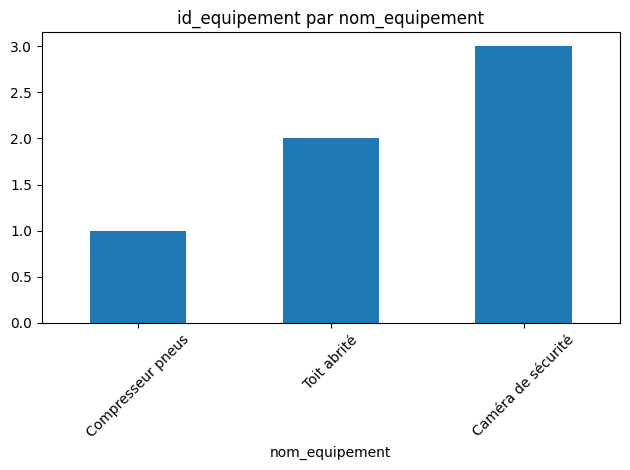


📋 Résultat :
╒═══════════╤══════════════╤═════════════════════════════╕
│   id_zone │ nom_zone     │ description                 │
╞═══════════╪══════════════╪═════════════════════════════╡
│         1 │ Centre-ville │ Zone centrale urbaine       │
├───────────┼──────────────┼─────────────────────────────┤
│         2 │ Quartier Est │ Zone résidentielle et calme │
╘═══════════╧══════════════╧═════════════════════════════╛

📈 Requêtes précédentes :
1. SELECT nom_equipement, id_equipement FROM equipement;
2. select * from zone
✅ Auto-sélection : X = 'nom_zone', Y = 'id_zone'


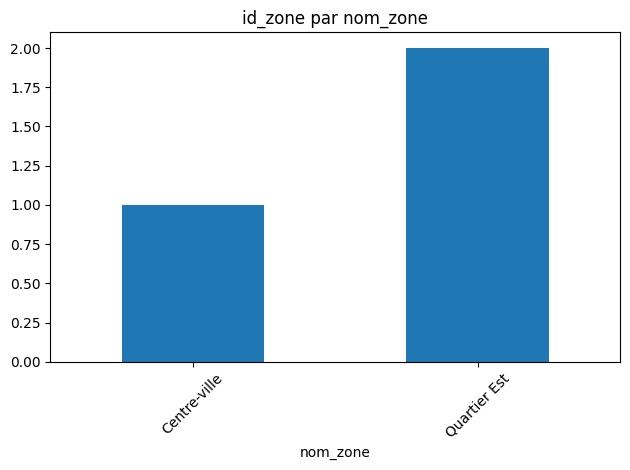

✅ Connexion fermée.


In [4]:
import mysql.connector
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

# Historique des résultats
historique = []

def connect_to_database():
    conn = mysql.connector.connect(
        host="localhost",
        port=3306,
        user="root",
        password="upsidedown",
        database="formation_numcity"
    )
    print("\nTape 'Stop' pour fermer la connexion.\n")

    while True:
        commande = input("Entrez la commande SQL : ")

        if commande.strip().lower() == "stop":
            print("✅ Connexion fermée.")
            conn.close()
            break

        if commande.strip().lower() == "graph":
            afficher_graphique()
            continue

        try:
            cursor = conn.cursor()
            cursor.execute(commande)
            rows = cursor.fetchall()
            columns = [desc[0] for desc in cursor.description]
            df = pd.DataFrame(rows, columns=columns)

            if df.empty:
                print("✅ Requête exécutée avec succès (aucun résultat à afficher).")
            else:
                print("\n📋 Résultat :")
                print(tabulate(df, headers="keys", tablefmt="fancy_grid", showindex=False))
                historique.append((commande, df))  # enregistre la requête et le résultat

        except mysql.connector.Error as err:
            print(f"❌ Erreur SQL : {err}")
        except Exception as e:
            print(f"⚠️ Erreur inattendue : {e}")
        finally:
            cursor.close()

# def afficher_graphique():
#     if not historique:
#         print("Aucune requête précédente à afficher.")
#         return

#     print("\n📈 Requêtes précédentes :")
#     for i, (cmd, df) in enumerate(historique):
#         print(f"{i + 1}. {cmd[:60]}")

#     choix = input("Entrez le numéro de la requête à visualiser : ")
#     try:
#         index = int(choix) - 1
#         if 0 <= index < len(historique):
#             _, df = historique[index]
#             colonnes_numeriques = df.select_dtypes(include='number').columns.tolist()

#             if len(colonnes_numeriques) < 1:
#                 print("⚠️ Pas de données numériques à représenter.")
#                 return

#             print("📊 Colonnes disponibles :", colonnes_numeriques)
#             col = input("Quelle colonne afficher ? (exactement) : ")
#             if col in df.columns:
#                 df.plot(kind="bar", x=df.columns[0], y=col, legend=False)
#                 plt.title(f"{col} par {df.columns[0]}")
#                 plt.xticks(rotation=45)
#                 plt.tight_layout()
#                 plt.show()
#             else:
#                 print("Colonne invalide.")
#         else:
#             print("Index invalide.")
#     except Exception as e:
#         print(f"❌ Erreur : {e}")
def afficher_graphique():
    if not historique:
        print("Aucune requête précédente à afficher.")
        return

    print("\n📈 Requêtes précédentes :")
    for i, (cmd, df) in enumerate(historique):
        print(f"{i + 1}. {cmd[:60]}")

    choix = input("Entrez le numéro de la requête à visualiser : ")

    try:
        index = int(choix) - 1
        if 0 <= index < len(historique):
            _, df = historique[index]

            colonnes_num = df.select_dtypes(include='number').columns.tolist()
            colonnes_cat = df.select_dtypes(exclude='number').columns.tolist()

            if not colonnes_num:
                print("❌ Aucune donnée numérique à représenter.")
                return
            if not colonnes_cat:
                print("❌ Aucune colonne textuelle pour l’axe X.")

            # Prise automatique de la première colonne texte + première colonne numérique
            x_col = colonnes_cat[0]
            y_col = colonnes_num[0]

            print(f"✅ Auto-sélection : X = '{x_col}', Y = '{y_col}'")

            df_plot = df[[x_col, y_col]]
            df_plot.plot(kind="bar", x=x_col, y=y_col, legend=False)
            plt.title(f"{y_col} par {x_col}")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

        else:
            print("❌ Numéro invalide.")
    except Exception as e:
        print(f"❌ Erreur : {e}")


def main():
    print("📘 Bienvenue dans le programme de gestion de la base de données MariaDB")
    print("🛠️ Commandes SQL disponibles :")
    print("  - SELECT * FROM table_name;")
    print("  - INSERT, UPDATE, DELETE...")
    print("  - GRAPH pour afficher un graphique")
    print("  - STOP pour quitter")

if __name__ == "__main__":
    main()
    connect_to_database()
